In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# get data

In [4]:
data_dir = Path("C:\\Users\\Ela\\Documents\\SemesterB\\hebNLP\\project_new\\data\\final_tagged\\data_exp_topics")

train_path = data_dir/"sentences_list_tagged_by_posts_shuffled.csv"
train_df = pd.read_csv(train_path, encoding="utf-8")
train_df.loc[:, "post_tag"] = train_df.post_tag.astype("category")
text = train_df["text"]
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   post_num       2696 non-null   int64   
 1   post_idx       2696 non-null   int64   
 2   text           2696 non-null   object  
 3   topic_tag      2696 non-null   int64   
 4   sentiment_tag  2696 non-null   int64   
 5   post_tag       2696 non-null   category
dtypes: category(1), int64(4), object(1)
memory usage: 108.2+ KB
None


# data exploration

In [5]:
def print_stats(train_df):
    print("train data")
    tot=len(train_df)
    print(train_df.post_tag.value_counts())
    print(train_df.post_tag.value_counts()/tot)
    print()
    print("train percentage:", len(train_df)/(len(train_df)))

In [6]:
print_stats(train_df)

train data
3    964
1    870
2    862
Name: post_tag, dtype: int64
3    0.357567
1    0.322700
2    0.319733
Name: post_tag, dtype: float64

train percentage: 1.0


In [7]:
def plot_data_stats(train_df):
    plt.hist(train_df.post_tag, density=True, label='train')
    plt.legend()


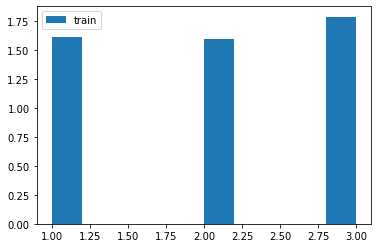

In [8]:
plot_data_stats(train_df)

In [9]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist(range=(0,250))

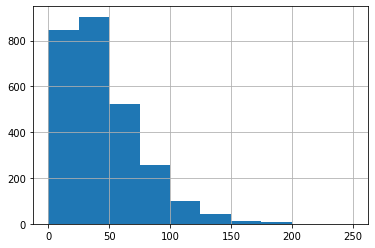

In [10]:
plot_character_length_histogram(train_df.text)

In [11]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(range=(0,60))

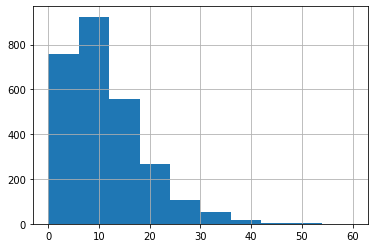

In [12]:
plot_word_number_histogram(train_df.text)

In [13]:
def get_hebrew_stopwords():
    stop_path=os.getcwd() + "/data/stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
    res.append("כש")    
    return res

In [14]:
def invert_words(words):
    return [w[::-1] for w in words]

In [15]:
stop=get_hebrew_stopwords()

In [36]:
import seaborn as sns
#from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:100]:
        if (len(word)>1 and word not in stop):
            x.append(word)
            y.append(count)
        if len(x) >= 20:
            break
            
    sns.barplot(x=y,y=invert_words(x))
    plt.title('Top Hok Haleom tagged non stopwords for the general dataset')
    plt.show()

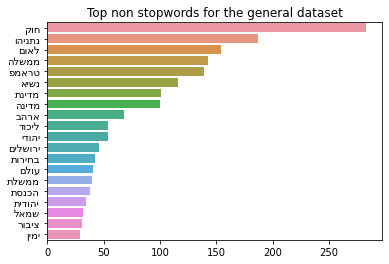

In [29]:
plot_top_non_stopwords_barchart(text, stop)

In [24]:
print(train_df[train_df.post_tag==1].head())

    post_num  post_idx                                               text  \
1         66        21                                        ראש ה ממשלה   
4         66        17                                 ב ה ארץ או ב ה חול   
6          7         6                                       צילום מסך מת   
8         92         7  אבל ה הבדל ה עיקרי בין ארהב ל ישראל הוא ה אופו...   
13        29         1          זה את הוא ביבי ש התחנן ב ה פני נשיא מצרים   

    topic_tag  sentiment_tag post_tag  
1           2              0        1  
4           0              2        1  
6           0              2        1  
8           0              2        1  
13          2             -1        1  


# Trump top words

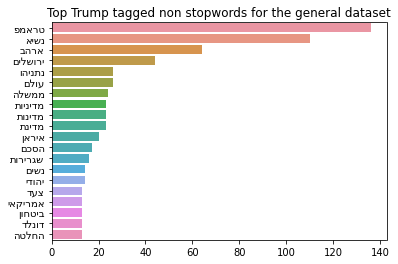

In [33]:
plot_top_non_stopwords_barchart(train_df[train_df.post_tag==1].text, stop)

# Netanyahu top words

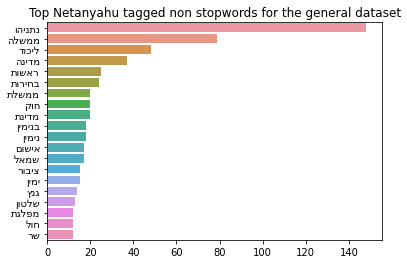

In [35]:
plot_top_non_stopwords_barchart(train_df[train_df.post_tag==2].text, stop)

# Hokhaleom top words

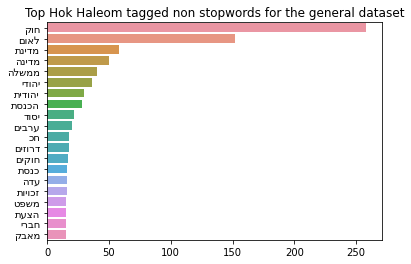

In [37]:
plot_top_non_stopwords_barchart(train_df[train_df.post_tag==3].text, stop)